In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
 def draw(G,  pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

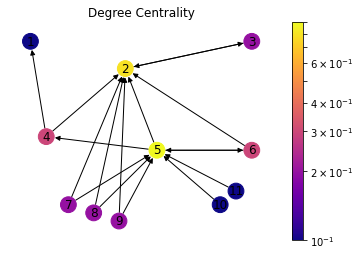

In [4]:
draw(DiG, dpos, nx.degree_centrality(DiG), 'Degree Centrality')

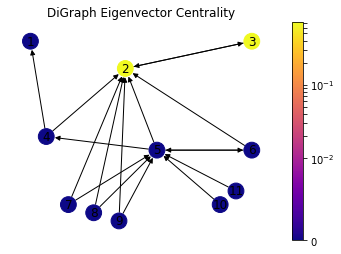

In [5]:
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 'DiGraph Eigenvector Centrality')

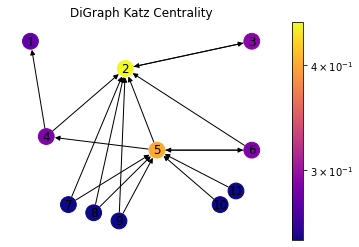

In [6]:
draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

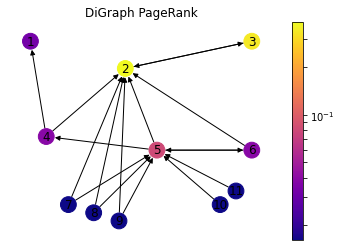

In [7]:
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85), 'DiGraph PageRank')

In [8]:
Adj=np.array(nx.to_numpy_matrix(DiG, nodelist=range(1,11)))
print(Adj)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [62]:
# Power iteration to find dominant eigenvalue and eigenvector
# Input:  A=matrix, x0=initial vector, k=number of steps, beta=free centrality
# Output: lambda_max=dominant eigenvalue, v_max=dominant eigenvector
def powerit(A,x0,k, beta=0):
    x=x0
    for j in range(k):
        u=((np.dot(x,x))**(-0.5))*x #u is a unit vector
        x=A.dot(u)
        lambda_j=u.dot(x) #Rayleigh quotient
    lambda_max=lambda_j
    v_max=(np.dot(x,x)**(-0.5))*x
    return lambda_max, v_max

In [63]:
x0=np.ones(10)
lambda_max,v_max=powerit(Adj.T,x0,k=500)
print(lambda_max,v_max)
print('node with highest eigenvalue centrality=',np.argmax((v_max)))
print(1/lambda_max)

0.906935898569887 [3.07052430e-04 5.37648806e-01 8.43165974e-01 1.53526215e-03
 3.07052430e-04 1.53526215e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
node with highest eigenvalue centrality= 2
1.1026137586756266


In [80]:
# Modified power iteration to find dominant eigenvalue and eigenvector
# Input:  A=matrix, x0=initial vector, k=number of steps, beta=free centrality
# Output: lambda_max=dominant eigenvalue, v_max=dominant eigenvector
def Katz_powerit(A,x0,k, alpha, beta=1):
    x=x0
    u=x0
    one=np.ones(len(A[0]))
    for j in range(k):
        x=alpha*A.dot(u)+beta*one
        u=((np.dot(x,x))**(-0.5))*x #u is a unit vector
    v=u
    return v

In [84]:
x0=np.zeros(10)
v=Katz_powerit(Adj.T,x0,k=500, alpha=1.0, beta=1.0)
print(v)
print('node with highest Katz centrality=',np.argmax(v))

[0.25708628 0.58122689 0.31663582 0.28384633 0.41748161 0.28384633
 0.20024693 0.20024693 0.20024693 0.20024693]
node with highest Katz centrality= 1


In [119]:
# Compute out degree
def kout(A):
    n=len(A[0])
    kout=np.zeros(n)
    Dinv=np.zeros(n)
    for i in range(n):
        kout[i]=0
        for j in range(n):
            kout[i]=kout[i]+A[i,j]
            if kout[i]!=0:
                Dinv[i]=1/kout[i]
            else:
                Dinv[i]=1
    return kout, Dinv 

In [120]:
kout,Dinv=kout(Adj)
print(kout)
print(Dinv)
#print(np.diag(Dinv))

[0. 1. 1. 2. 3. 2. 2. 2. 2. 1.]
[1.         1.         1.         0.5        0.33333333 0.5
 0.5        0.5        0.5        1.        ]


In [121]:
# Modified power iteration to find dominant eigenvalue and eigenvector
# Input:  A=matrix, x0=initial vector, k=number of steps, beta=free centrality
# Output: lambda_max=dominant eigenvalue, v_max=dominant eigenvector
def PR_powerit(A,D, x0,k, alpha=0.85, beta=1):
    x=x0
    u=x0
    one=np.ones(len(A[0]))
    for j in range(k):
        x=alpha*(A.dot(np.diag(D))).dot(u)+beta*one
        u=((np.dot(x,x))**(-0.5))*x #u is a unit vector
    v=u
    return v 

In [122]:
x0=np.zeros(10)
v1=PR_powerit(Adj.T,Dinv,x0,k=500, alpha=0.85, beta=1)
print(v1)

[0.27683032 0.48650084 0.35018238 0.2763225  0.40724908 0.2763225
 0.24773683 0.24773683 0.24773683 0.24773683]
